# SyriaTel Customer Churn

# Company Overview

Syria Tel Mobile Telecommunication is a private company that provides mobile telecommunication and data services. They are based in Damascus, Syria. The company offers services including calls, news, message, GSM and internet services, thereby making the life of customers easier with reasonable prices.

https://www.google.com/imgres?imgurl=https%3A%2F%2Fsana.sy%2Fen%2Fwp-content%2Fuploads%2F2017%2F12%2FSyrian-Telecom-310x165.jpg&imgrefurl=https%3A%2F%2Fsana.sy%2Fen%2F%3Ftag%3Dsyrian-telecom&tbnid=046MdFi4-qH84M&vet=12ahUKEwiDl7TZ2YX9AhWphCcCHe0WD3gQMygBegUIARCyAQ..i&docid=MkGxQ2z7zPIiCM&w=310&h=165&q=syria%20telecom&ved=2ahUKEwiDl7TZ2YX9AhWphCcCHe0WD3gQMygBegUIARCyAQ

# Problem Statement

SyriaTel is looking to predict whether a customer will ("soon") stop doing business with them or not. This is because they are looking to minimize the money lost because of customers who stop utilizing their services.


# Objective

The main objective of this project is to predict whether there is a pattern in the customers who stop using the company's Telcom services and if there is, come up with a classifier that predicts the pattern


# 1.0 Business Understanding

SyriaTel Mobile Communication is looking to minimize the cost and expenses that come with a customer churning from their services

Using the data extrcated from Kaggle, we would like to see whether there is a relationship between the customers who churn and those who retain their service usage

# 1.1 DATA UNDERSTANDING:

Familiarizing with the dataset helps the shareholders have a broader overview of how one variable is in relation with another variable. First, lets perform Exploratory Data analysis with the provided dataset

Import the necessary python libraries

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import plotly.offline as po
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE



Read the data file

In [23]:
Telcom_data = pd.read_csv("E:/Data Science/DATA/bigml_59c28831336c6604c800002a.csv")
Telcom_data.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [24]:
Telcom_data.tail()

state  account length  area code phone number international plan  \
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      total intl charge  customer service calls  churn  
3328               2.67                       2  False  
3329               2.59                       3  False  
3330               3.81                       2  False  
3331               1.35                       2  False  
3332               3.70                       0  False  

[5 rows x 21 columns]

From the first five rows and the last five rows, we see that there are columns that are binary classified. In that, the various rows either have the output:yes or no/ true or false. From the above, the column 'international plan' , 'churn' and 'voice mail plan' are the binary classified columns.

Undersatnd the shape(rows and columns in the dataset)

In [25]:
Telcom_data.shape

(3333, 21)

From the above, we see that there are 3333rows and 21columns 

Check the statistical information of the numerical columns present in the dataset

In [26]:
Telcom_data.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

Understand the columns and data types present and ensure all numeric variables are either as floats or integers while the categorical variables are objects

In [27]:
Telcom_data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [28]:
Telcom_data.columns = [c.replace(' ', '_') for c in Telcom_data.columns]

In [29]:
Telcom_data.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [30]:
Telcom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

Check for missing values and unique values

In [31]:
Telcom_data.nunique()

state                       51
account_length             212
area_code                    3
phone_number              3333
international_plan           2
voice_mail_plan              2
number_vmail_messages       46
total_day_minutes         1667
total_day_calls            119
total_day_charge          1667
total_eve_minutes         1611
total_eve_calls            123
total_eve_charge          1440
total_night_minutes       1591
total_night_calls          120
total_night_charge         933
total_intl_minutes         162
total_intl_calls            21
total_intl_charge          162
customer_service_calls      10
churn                        2
dtype: int64

From the above summary, we see that there are 51 states, within 3 area codes. The phone numbers are unique, indicating that the data acquired was from 3333 different customers.

In [32]:
Telcom_data['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

From the above, we see that the number of customers who are likely to churn are 483 against the 2850 who are more likely not to churn.

Now, we can convert the columns that are binary classified into either 1 and 0

In [33]:
Telcom_data.head()

state  account_length  area_code phone_number international_plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer_service_calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [34]:
Telcom_data.loc[Telcom_data.international_plan== 'yes','international_plan'] = 1
Telcom_data.loc[Telcom_data.international_plan=='no', 'international_plan'] = 0

In [35]:
Telcom_data.head()

state  account_length  area_code phone_number international_plan  \
0    KS             128        415     382-4657                  0   
1    OH             107        415     371-7191                  0   
2    NJ             137        415     358-1921                  0   
3    OH              84        408     375-9999                  1   
4    OK              75        415     330-6626                  1   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer_service_calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [36]:
Telcom_data.loc[Telcom_data.voice_mail_plan== 'yes','voice_mail_plan'] = 1
Telcom_data.loc[Telcom_data.voice_mail_plan=='no', 'voice_mail_plan'] = 0

In [37]:
Telcom_data.head()

state  account_length  area_code phone_number international_plan  \
0    KS             128        415     382-4657                  0   
1    OH             107        415     371-7191                  0   
2    NJ             137        415     358-1921                  0   
3    OH              84        408     375-9999                  1   
4    OK              75        415     330-6626                  1   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0               1                     25              265.1              110   
1               1                     26              161.6              123   
2               0                      0              243.4              114   
3               0                      0              299.4               71   
4               0                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer_service_calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [39]:
Telcom_data.loc[Telcom_data.churn== 'True','churn'] = 1
Telcom_data.loc[Telcom_data.churn=='False', 'churn'] = 0

In [40]:
Telcom_data['churn'].head()

0    False
1    False
2    False
3    False
4    False
Name: churn, dtype: object

In [42]:
# Check for duplicated rows, no duplicated rows to deal with.
Telcom_data.duplicated().sum()

0

In [44]:
# Check for missing values, no missing values.
Telcom_data.isnull().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [46]:
# Remove customer number feature it is contact information on the client and adds no value to the analysis

Telcom_data.drop(['phone_number'],axis=1,inplace=True)
Telcom_data.head()

state  account_length  area_code international_plan voice_mail_plan  \
0    KS             128        415                  0               1   
1    OH             107        415                  0               1   
2    NJ             137        415                  0               0   
3    OH              84        408                  1               0   
4    OK              75        415                  1               0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer_service_calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [50]:
Telcom_data.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

# 1.2 Exploratory Data Analysis

Feature Types
1. Continuous features are numeric values with no specific values. The continous features are:
account length,
number vmail messages,
3total day minutes,
total day calls,
total day charge,
total eve minutes,
total eve calls,
total eve charge,
total night minutes,
total night calls,
total night charge,
total intl minutes,
total intl charge and 
customer service calls
2. Categorical features are values that have specific number of categories. The categorical features here are:
state, 
area code, 
international plan and 
voicemail plan

In [53]:

numeric_cols = ['account_length','number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn']
categoric_cols = ['state','area code','international_plan', 'voice_mail_plan']

# 1.2.1 Data Visualizations

From the dataset, our target variable is churn. If a customer churns, that means they have cancelled their subscription with Telcom. Let's visualize this:

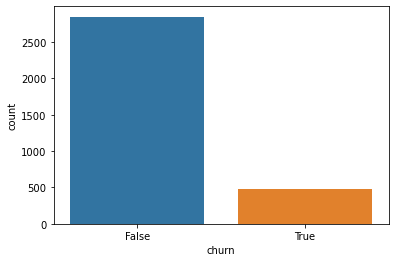

In [54]:
sns.countplot(data=Telcom_data, x='churn');

The number of customers who are likely to churn are less than than the customers that are likely to churn by an exceeding wide gap. To mean that, if we create a model using the provided facts, there will be a class imbalance 

In [60]:
# Pie chart of area code feature
area = Telcom_data['area_code'].value_counts()
transuction = area.index
quantity = area.values

# draw pie circule with plotly
figure = px.pie(Telcom_data,
               values = quantity,
               names = transuction,
               hole = .5,
               title = 'Distribution of Area Code Feature')
figure.show()

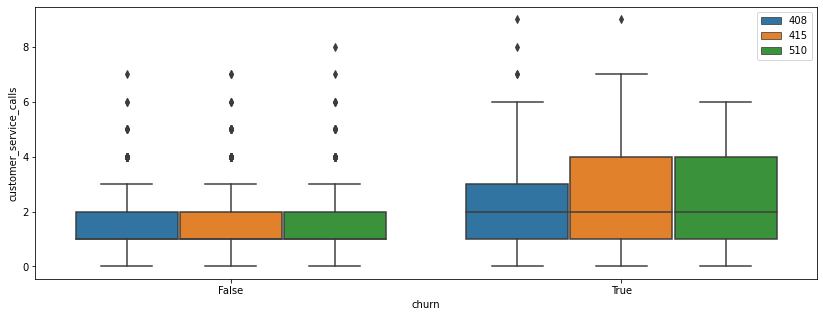

In [63]:
# Boxplot to see which area code has the highest churn
plt.figure(figsize=(14,5))
sns.boxplot(data=Telcom_data,x='churn',y='customer_service_calls',hue='area_code');
plt.legend(loc='upper right');

In [ ]:
#From the above, we see there are outliers in all the area codes

Visulaizing per state to see the number of customers who did churn and the number that did not churn

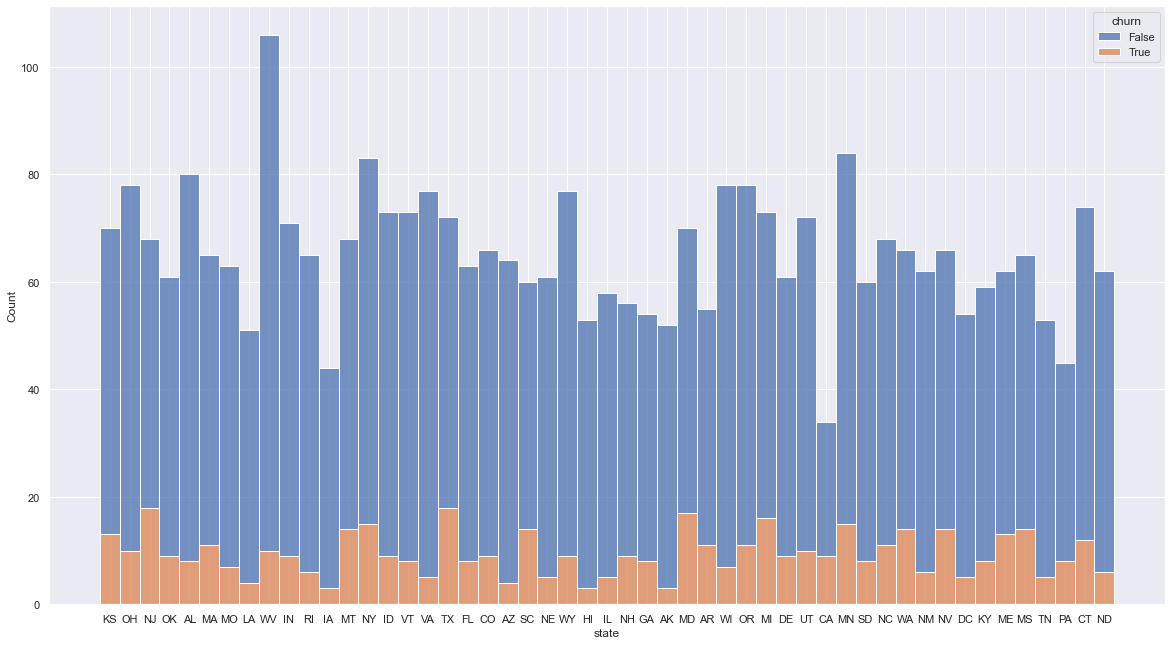

In [69]:
sns.histplot(binwidth=0.5, x="state", hue="churn", data=Telcom_data, stat="count", multiple="stack");

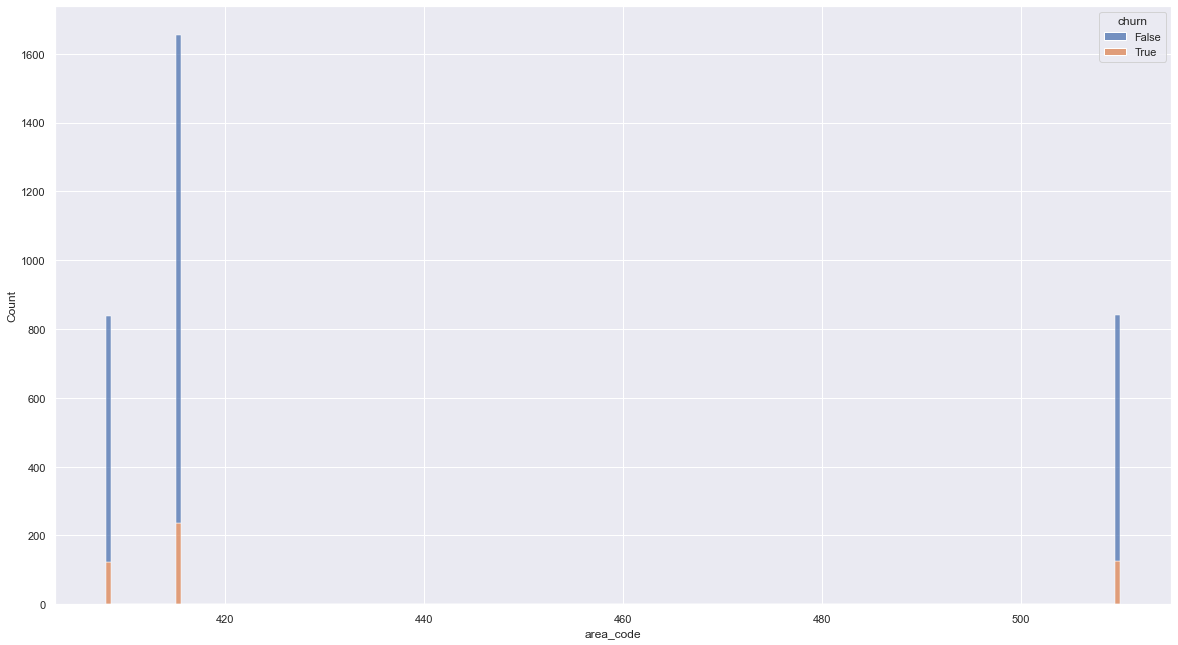

In [70]:
sns.histplot(binwidth=0.5, x="area_code", hue="churn", data=Telcom_data, stat="count", multiple="stack");

Lets now see the distribution of the various numeric columns in the dataset 

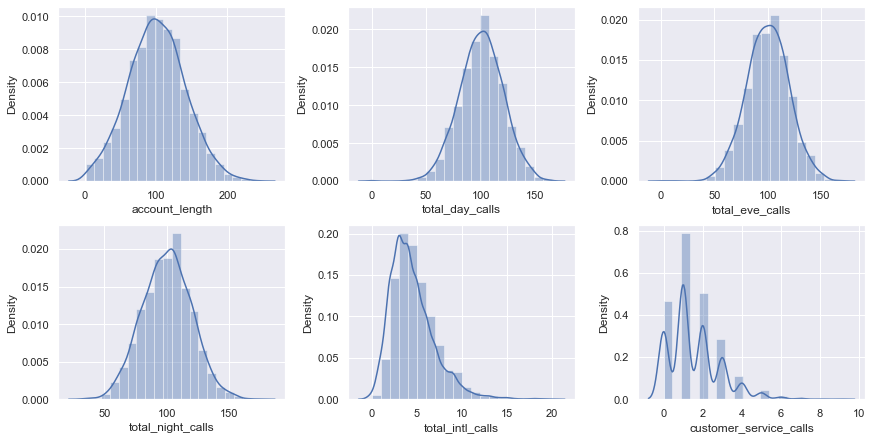

In [72]:
f,ax=plt.subplots(2,3,figsize=(12,6),constrained_layout = True)
sns.distplot(Telcom_data["account_length"],bins=20,ax=ax[0,0]);

sns.distplot(Telcom_data["total_day_calls"],bins=20,ax=ax[0,1]);

sns.distplot(Telcom_data["total_eve_calls"],bins=20,ax=ax[0,2]);

sns.distplot(Telcom_data["total_night_calls"],bins=20,ax=ax[1,0]);

sns.distplot(Telcom_data["total_intl_calls"],bins=20,ax=ax[1,1]);

sns.distplot(Telcom_data["customer_service_calls"],bins=20,ax=ax[1,2]);

Out of all the numeric columns in the dataset, customer_service_calls is the only column that is not normally distributed.
The total international calls colum is skewed to the right.

The customer service calls column has very few peaks

In the cell below, we will see the relationship between each column in relation to the target variable churn

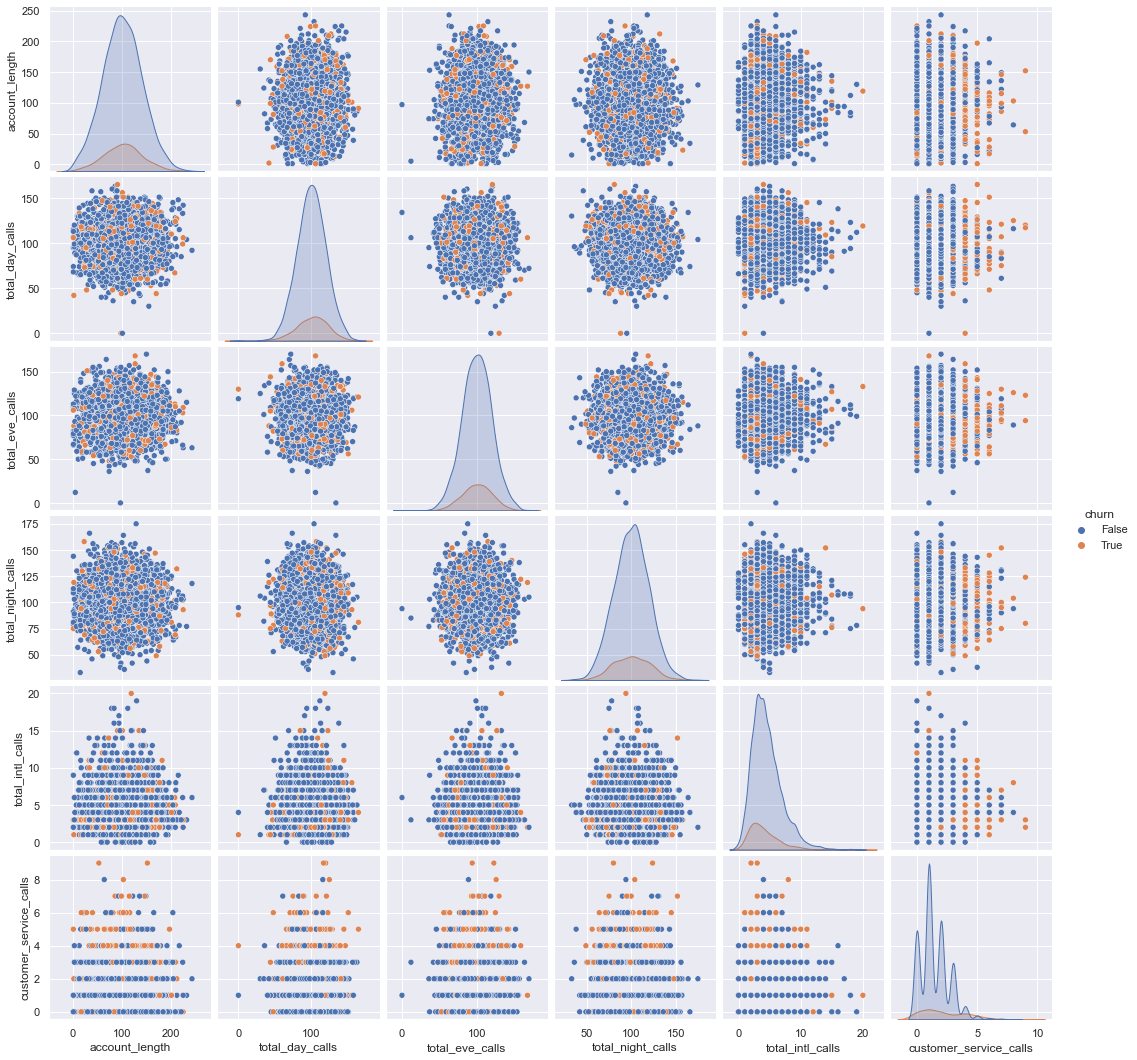

In [75]:
Telkom_data_analysis = Telcom_data[["account_length","total_day_calls","total_eve_calls","total_night_calls",
                "total_intl_calls","customer_service_calls","churn"]]
sns.pairplot(Telkom_data_analysis, hue="churn",height=2.5);
plt.show();

# Checking for Correlations between the variables 

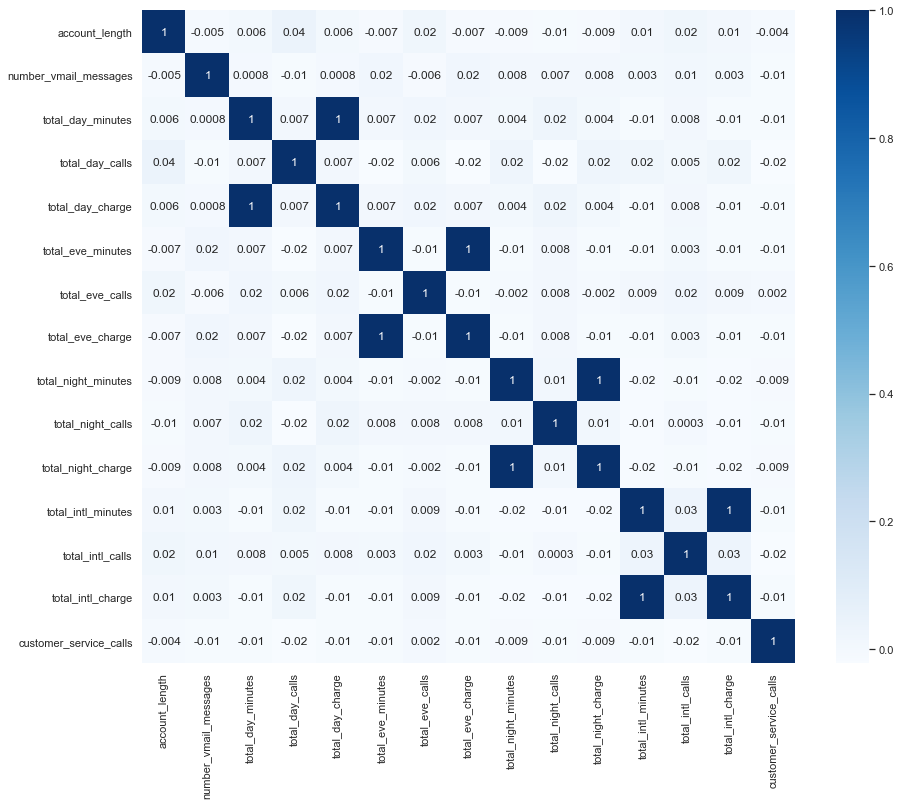

In [76]:
corr_mat = Telcom_data[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

The following are features that are positively correlated to one another:
1. The total_day_charge and total_day_calls
2. The total_eve_minutes and the total_charge
3. The total_night_calls and the total_night_charge
4. The total_intl_calls and the total_intl_charge

The analysis from this coorrelation being that for every call, there is an equal amount that is charged as an expense for making the phone call. This kind of relationship shows direct causal relationship. It indicates that there is perfect collinearity between the features above.

# Data Preprocessing

# Detecting and Removing the Outliers using Std.

In [86]:
def drop_numerical_outliers(Telcom_data, z_thresh=3):
    constrains = Telcom_data.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    Telcom_data.drop(Telcom_data.index[~constrains], inplace=True)
    
drop_numerical_outliers(Telcom_data)

In [87]:
Telcom_data.shape

(3127, 20)

From the above cell, we see that the number of rows have reduced from the main dataset which had 3333 rows. Removing outliers is necessary in the standardization of our model to ensure it performs well

# Collinearity:
Drop columns that are highly collinear

In [91]:
# Calculate the correlation matrix and take the absolute value
correlation_matrix = Telcom_data.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
Telcom_data1 = correlation_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in Telcom_data1.columns if any(Telcom_data1[c] >  0.90)]

Telcom_data2 = Telcom_data.drop(to_drop, axis=1) # Drop the features

In [93]:
#Check for the number of columns in the dataframe after removing columns that are almost perfectly collinear
Telcom_data2.shape

(3127, 16)

In [ ]:
We see that there were 4 columns dropped. Lets check the remaining cols.

In [96]:
Telcom_data2.columns.value_counts()

churn                     1
total_day_calls           1
total_eve_calls           1
total_intl_charge         1
total_intl_calls          1
international_plan        1
total_night_charge        1
customer_service_calls    1
account_length            1
total_day_charge          1
number_vmail_messages     1
total_night_calls         1
area_code                 1
state                     1
total_eve_charge          1
voice_mail_plan           1
dtype: int64

In [98]:
Telcom_data2['churn'].value_counts()

False    2690
True      437
Name: churn, dtype: int64

Now, we can scale the columns above to check for the patterns between the columns and the target variable colun 'churn'

Before scaling, we convert the target column into a numeric column since it is categorical(True/False)

In [99]:
Telcom_data2['churn'] = Telcom_data2['churn'].map({True: 1, False: 0}).astype('int') 
Telcom_data2.head()

state  account_length  area_code international_plan voice_mail_plan  \
0    KS             128        415                  0               1   
1    OH             107        415                  0               1   
2    NJ             137        415                  0               0   
3    OH              84        408                  1               0   
4    OK              75        415                  1               0   

   number_vmail_messages  total_day_calls  total_day_charge  total_eve_calls  \
0                     25              110             45.07               99   
1                     26              123             27.47              103   
2                      0              114             41.38              110   
3                      0               71             50.90               88   
4                      0              113             28.34              122   

   total_eve_charge  total_night_calls  total_night_charge  total_intl_calls  \
0             16.78                 91               11.01                 3   
1             16.62                103               11.45                 3   
2             10.30                104                7.32                 5   
3              5.26                 89                8.86                 7   
4             12.61                121                8.41                 3   

   total_intl_charge  customer_service_calls  churn  
0               2.70                       1      0  
1               3.70                       1      0  
2               3.29                       0      0  
3               1.78                       2      0  
4               2.73                       3      0

The state column will affect scaling therefore, we have to create binary columns based on the number of unique categories in the categorical column.


In [106]:
dummy_state = pd.get_dummies(Telcom_data2["state"],dtype=np.int64,prefix="state_is")
dummy_area_code = pd.get_dummies(Telcom_data2["area_code"],dtype=np.int64,prefix="area_code_is")
dummy_international_plan = pd.get_dummies(Telcom_data2["international_plan"],dtype=np.int64,prefix="international_plan_is",drop_first = True)
dummy_voice_mail_plan = pd.get_dummies(Telcom_data2["voice_mail_plan"],dtype=np.int64,prefix="voice_mail_plan_is",drop_first = True)


Telcom_data2 = pd.concat([Telcom_data2,dummy_state,dummy_area_code,dummy_international_plan,dummy_voice_mail_plan],axis=1)
Telcom_data2 = Telcom_data2.loc[:,~Telcom_data2.columns.duplicated()]
Telcom_data2 = Telcom_data2.drop(['state','area_code','international_plan','voice_mail_plan'],axis=1)

Telcom_data2.head()

account_length  number_vmail_messages  total_day_calls  total_day_charge  \
0        0.587963               0.520833         0.586207          0.773038   
1        0.490741               0.541667         0.698276          0.448015   
2        0.629630               0.000000         0.620690          0.704894   
3        0.384259               0.000000         0.250000          0.880702   
4        0.342593               0.000000         0.612069          0.464081   

   total_eve_calls  total_eve_charge  total_night_calls  total_night_charge  \
0         0.487179          0.484801           0.422414            0.644461   
1         0.521368          0.478484           0.525862            0.677395   
2         0.581197          0.228977           0.534483            0.368263   
3         0.393162          0.030004           0.405172            0.483533   
4         0.683761          0.320174           0.681034            0.449850   

   total_intl_calls  total_intl_charge  ...  state_is_VT  state_is_WA  \
0          0.222222           0.474178  ...            0            0   
1          0.222222           0.708920  ...            0            0   
2          0.444444           0.612676  ...            0            0   
3          0.666667           0.258216  ...            0            0   
4          0.222222           0.481221  ...            0            0   

   state_is_WI  state_is_WV  state_is_WY  area_code_is_0.0  \
0            0            0            0                 0   
1            0            0            0                 0   
2            0            0            0                 0   
3            0            0            0                 1   
4            0            0            0                 0   

   area_code_is_0.06862745098039191  area_code_is_1.0  \
0                                 1                 0   
1                                 1                 0   
2                                 1                 0   
3                                 0                 0   
4                                 1                 0   

   international_plan_is_1  voice_mail_plan_is_1  
0                        0                     1  
1                        0                     1  
2                        0                     0  
3                        1                     0  
4                        1                     0  

[5 rows x 68 columns]

# Scaling

In [107]:
scaler = MinMaxScaler()

def scaling(columns):
    return scaler.fit_transform(Telcom_data2[columns].values.reshape(-1,1))

for i in Telcom_data2.select_dtypes(include=[np.number]).columns:
    Telcom_data2[i] = scaling(i)
Telcom_data2.head()

account_length  number_vmail_messages  total_day_calls  total_day_charge  \
0        0.587963               0.520833         0.586207          0.773038   
1        0.490741               0.541667         0.698276          0.448015   
2        0.629630               0.000000         0.620690          0.704894   
3        0.384259               0.000000         0.250000          0.880702   
4        0.342593               0.000000         0.612069          0.464081   

   total_eve_calls  total_eve_charge  total_night_calls  total_night_charge  \
0         0.487179          0.484801           0.422414            0.644461   
1         0.521368          0.478484           0.525862            0.677395   
2         0.581197          0.228977           0.534483            0.368263   
3         0.393162          0.030004           0.405172            0.483533   
4         0.683761          0.320174           0.681034            0.449850   

   total_intl_calls  total_intl_charge  ...  state_is_VT  state_is_WA  \
0          0.222222           0.474178  ...          0.0          0.0   
1          0.222222           0.708920  ...          0.0          0.0   
2          0.444444           0.612676  ...          0.0          0.0   
3          0.666667           0.258216  ...          0.0          0.0   
4          0.222222           0.481221  ...          0.0          0.0   

   state_is_WI  state_is_WV  state_is_WY  area_code_is_0.0  \
0          0.0          0.0          0.0               0.0   
1          0.0          0.0          0.0               0.0   
2          0.0          0.0          0.0               0.0   
3          0.0          0.0          0.0               1.0   
4          0.0          0.0          0.0               0.0   

   area_code_is_0.06862745098039191  area_code_is_1.0  \
0                               1.0               0.0   
1                               1.0               0.0   
2                               1.0               0.0   
3                               0.0               0.0   
4                               1.0               0.0   

   international_plan_is_1  voice_mail_plan_is_1  
0                      0.0                   1.0  
1                      0.0                   1.0  
2                      0.0                   0.0  
3                      1.0                   0.0  
4                      1.0                   0.0  

[5 rows x 68 columns]

# Train-test split

In [109]:
X=Telcom_data2.drop(['churn'],axis=1)
y=Telcom_data2['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 45)

The difference in the customers who churned vs the number of the customers who did not churn is extreme. As a result, there is a class imbalance. To handle class imbalance, there are techniques. These techniques are:

1. Undersampling: This technique involves removing samples from the majority class in order to balance the classes.

2. Up-sampling: This technique involves adding more samples to the minority class in order to balance the classes.

3. Cost-sensitive learning: This technique involves adjusting the learning algorithm to be more sensitive to the minority class by assigning different misclassification costs to the different classes.

4. Class weighting: This technique involves assigning different weights to the different classes in the learning algorithm. This approach is often used in decision tree algorithms.

5. Ensemble methods: This technique involves using multiple learning algorithms to handle class imbalances. For instance, using a combination of oversampling and undersampling techniques.

6. Change the performance metric: This technique involves changing the performance metric to be more sensitive to the minority class, for instance using precision or F1-score instead of accuracy.

7. SMOTE(Synthetic Minority Over-sampling Technique) is a oversampling technique used to handle class imbalances.It works by creating synthetic samples of the minority class rather than simply duplicating existing samples.

In [113]:
sm = SMOTE(k_neighbors=5, random_state=42)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [116]:
print('Before OverSampling, X_train={}'.format(X_train.shape))
print('Before OverSampling, y_train={}'.format(y_train.shape)) 
print('After OverSampling, X_train_over={}'.format(X_train_over.shape))
print('After OverSampling, y_train_over={}'.format(y_train_over.shape))

Before OverSampling, X_train=(2345, 67)
Before OverSampling, y_train=(2345,)
After OverSampling, X_train_over=(4024, 67)
After OverSampling, y_train_over=(4024,)


# Visual reprsentation of before and after applying SMOTE

In [117]:
churn = Telcom_data2['churn'].value_counts()
transuction = churn.index
quantity = churn.values

# draw pie circule with plotly
figure = px.pie(y_train_over,
               values = quantity,
               names = transuction,
               hole = .5,
               title = 'Distribution of Churn - Before SMOTE')
figure.show()


In [118]:
y_train_over_1 = y_train_over.to_frame()
churn = y_train_over_1['churn'].value_counts()
transuction = churn.index
quantity = churn.values

# draw pie circule with plotly
figure = px.pie(y_train_over_1,
               values = quantity,
               names = transuction,
               hole = .5,
               title = 'Distribution of Churn - After SMOTE')
figure.show()

# Modelling

After analysing the data, there are 2 probable classifiers that can help predict the reason why customers churn while others do not.
For the base model, I will use Decision tree classifier, then improve on it to a random forest classifier

# MODEL 1: Decision Tress Classifier

A Decision Tree Classifier is a supervised machine learning algorithm that can be used for both classification and regression problems. It works by recursively dividing the data into smaller subsets based on the features until it reaches a leaf node that represents a prediction. The prediction is based on the majority class label in the samples in that leaf node.

In [121]:
X=Telcom_data2.drop(['churn'],axis=1)
y=Telcom_data2['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 45)

In [130]:
tree = DecisionTreeClassifier(max_depth=7)
tree.fit(X_train_over, y_train_over)
preds = tree.predict(X_test)
print('Accuracy:', accuracy_score(y_test, preds))

Accuracy: 0.9130434782608695


In [128]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

tree = DecisionTreeClassifier()
tree.fit(X_train_over,y_train_over)
params = {'max_depth': np.arange(1, 21, 2),
         'min_samples_split': np.arange(2, 11, 2),
         'min_samples_leaf': np.arange(1, 6),
         'criterion': ['gini', 'entropy']}

tree_grid = GridSearchCV(tree, params, cv=kf, scoring='accuracy', n_jobs=-1)
tree_grid.fit(X_train_over, y_train_over)
tree_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 19,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

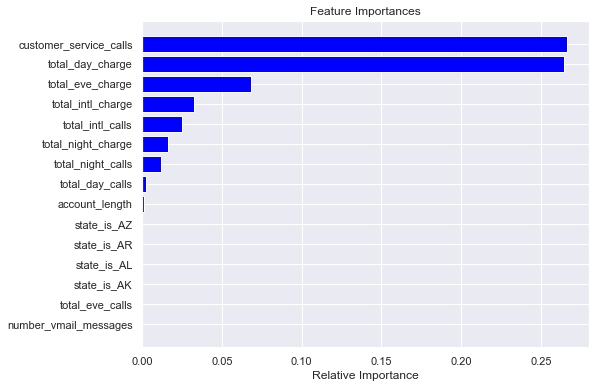

In [146]:
feature_names = list(X_train_over.columns)
importances = tree.feature_importances_[0:15]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [135]:
print((classification_report(y_test, preds, target_names=['0', '1'])))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       678
           1       0.64      0.80      0.71       104

    accuracy                           0.91       782
   macro avg       0.80      0.86      0.83       782
weighted avg       0.92      0.91      0.92       782



In [137]:
print("DECISION TREE CLASSIFIER MODEL:")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,preds),5))
print('F1 score for testing set: ',round(f1_score(y_test,preds),5))
print('Recall score for testing set: ',round(recall_score(y_test,preds),5))
print('Precision score for testing set: ',round(precision_score(y_test,preds),5))

DECISION TREE CLASSIFIER MODEL:
Accuracy score for testing set:  0.91304
F1 score for testing set:  0.7094
Recall score for testing set:  0.79808
Precision score for testing set:  0.63846


# The confusion matrix of DT Model

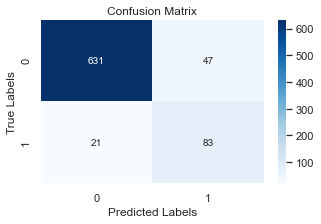

In [145]:
conf_matx_dt = confusion_matrix(y_test, preds)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(conf_matx_dt, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

# Analysis from the Decision Tree

The top most important features that are influencing the decisions of the customers to either churn or not are:
1. The customer service calls
2. The total day charges and lastly
3. The evening charges

According to the decision tree classifier, the reason why customers are cancelling their subscriptions From the company could be influenced from the above features

The F1 score and the accuracy of this model show that it has performed well

# MODEL 2: RANDOM FOREST CLASSIFIER

Random Forest Classifier is an ensemble learning algorithm that combines multiple decision trees to make a prediction.The idea behind random forest is to generate multiple decision trees on a randomly selected subset of the data, and then take the average (for regression problems) or majority vote (for classification problems) of the predictions made by each tree

In [148]:
# Object creation
random_forest= RandomForestClassifier() 
#fit the data
random_forest.fit(X_train_over,y_train_over)
#predictions 
y_pred_rf = random_forest.predict(X_test)

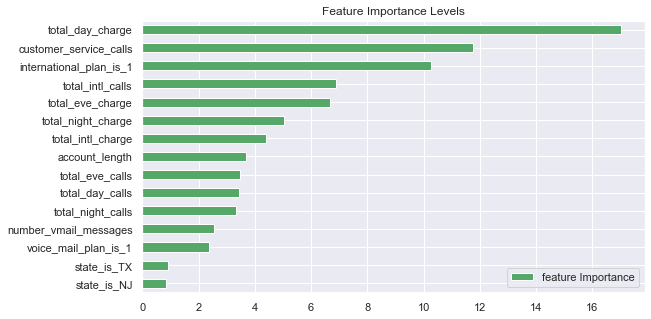

In [152]:
feat_importance =pd.DataFrame({"feature Importance": random_forest.feature_importances_*100},index = X_train_over.columns)
feat_importance.sort_values(by = "feature Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "g",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()

In [150]:
print(classification_report(y_test, y_pred_rf, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       678
           1       0.73      0.69      0.71       104

    accuracy                           0.93       782
   macro avg       0.84      0.83      0.84       782
weighted avg       0.92      0.93      0.92       782



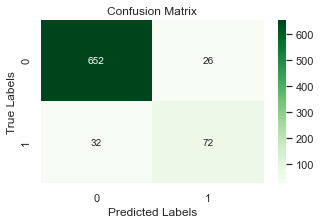

In [155]:
conf_mtx_rf = confusion_matrix(y_test, y_pred_rf)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(conf_mtx_rf, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

# Analysis of Random Forest

The graph on feature importance levels illustrates the features that are most likely to influence the decision of a customer:
1. Total day charge
2. Customer service calls
3. International plan (Yes-1)
    

The F1 score of this model shows that it has performed well, as well as the accuracy level

# MODEL 3: LOGISTIC REGRESSION Model

The dataset from Syria Telcom is aimed at understanding the reasons as to why a customer would most likely churn. As a result, the output as to whether the customer churns or no is yes or no which is a categoriacl feature. Thus Logistic regression will be an effective model to narrow down to the causes of customer's churning

In [158]:
lr= LogisticRegression()

#fitting the data & getting predictions
lr.fit(X_train_over,y_train_over) 
y_pred_lr = lr.predict(X_test) 

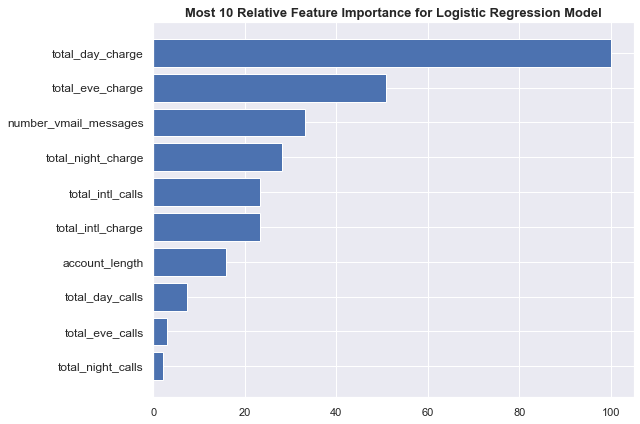

In [159]:
# Feature Importances

feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]
sorted_idx = np.argsort(feature_importance)[0:10]
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(9, 6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
plt.title('Most 10 Relative Feature Importance for Logistic Regression Model', fontsize=13, fontweight='bold')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)

plt.tight_layout()
plt.show()

In [160]:
print(classification_report(y_test, y_pred_lr, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.94      0.77      0.84       678
           1       0.31      0.69      0.43       104

    accuracy                           0.76       782
   macro avg       0.63      0.73      0.64       782
weighted avg       0.86      0.76      0.79       782



In [162]:
print("LOGISTIC REGRESSION CLASSIFIER MODEL:")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_lr),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_lr),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_lr),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_lr),5))

LOGISTIC REGRESSION CLASSIFIER MODEL:
Accuracy score for testing set:  0.75575
F1 score for testing set:  0.42985
Recall score for testing set:  0.69231
Precision score for testing set:  0.31169


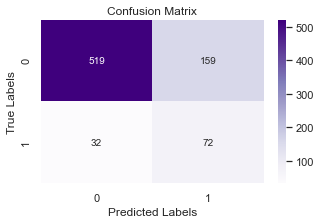

In [165]:
conf_mtx_lr = confusion_matrix(y_test, y_pred_lr)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(conf_mtx_lr, annot=True, cmap='Purples', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

# Analysis of Logistic Regression Model

From the relative feature importance of logistic regression model graph, we see that the features that are more likely to influence the decision of a customer are:
1. Total day charge
2. Total evening charge and
3. The total voice mail messages
    

The overall performance of the model in terms of the F1 score, which is at 42% shows that the model will be predicting accurate results half of the time. The accuracy level is at 75.55% to mean that the model is not so poor, but again, it is not as perfect.

# Model Evaluation

From the models above: Logistic Regression appears to be the least reliable of them all in accordance with the F1 SCORE. But aother way to choose which model will be more reliable for this problem is by the use of ROC AND AUC

Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC) are two common metrics used to compare the performance of different binary classification models. ROC plots the true positive rate (TPR) against the false positive rate (FPR) at various classification thresholds. AUC represents the area under the ROC curve and ranges between 0 and 1, with a value of 1 indicating perfect classification and a value of 0.5 indicating random classification.

In [174]:
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier()]


result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_over, y_train_over)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

Visualize the above 

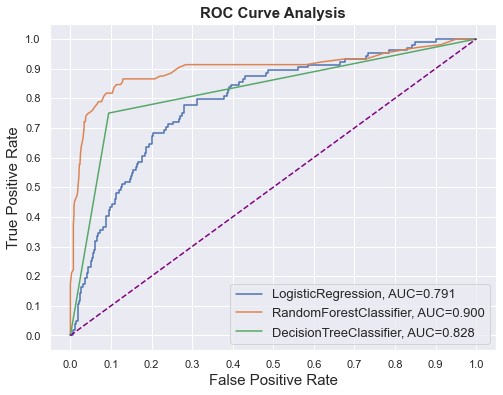

In [176]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='purple', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()


From the ROC curve analysis above, we see that the logistic regression classifier is the least performing model with the curve being further right from the true positive rate axis
The Random forest classifier is closer to the TPR axis, thus has the best performance

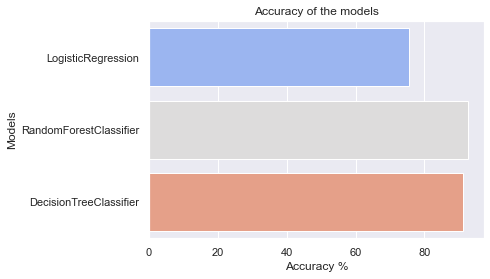

In [177]:
models = [lr,random_forest,tree]

result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, palette="coolwarm")
plt.xlabel('Accuracy %')
plt.title('Accuracy of the models');

According to the accurcay of the models, the random forest classifier performs better than all the other 2 models while LR is the least performing

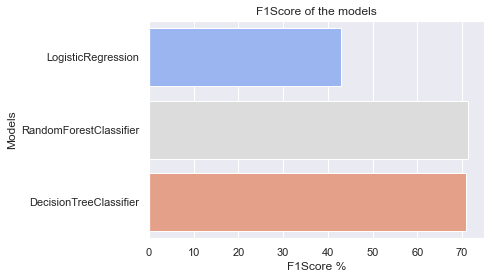

In [178]:
models = [lr,random_forest,tree]

result = []
results = pd.DataFrame(columns= ["Models","F1Score"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    precision = f1_score(y_test, y_pred)    
    result = pd.DataFrame([[names, precision*100]], columns= ["Models","F1Score"])
    results = results.append(result)
    
    
sns.barplot(x= 'F1Score', y = 'Models', data=results, palette="coolwarm")
plt.xlabel('F1Score %')
plt.title('F1Score of the models');

According to the F1 Score above, we see that the random forest classifier is slightly better than the decision tree classifier. Once again, we see the poor performance in the Logistic regression model

# Model Analysis Conclusion

The Random forest classifier is the best out of the three classifiers and thus will be the model we use going forward to predict the customers whi are most likely to churn.This will help SyriaTel company have a rough idea on what is expected of them from their customers


To sharpen the model to almost perfection, hyperparameter tuning will be the next step so that there is optimal performance of this model when it predicts a new dataset

# Hyperparamer tuning

In [179]:
rf_params = {"max_depth": [8,15,20],
             "n_estimators":[500,1000],
             "min_samples_split":[5,10,15],
             "criterion":['entropy','gini']}

In [181]:
randomforest_model2 = RandomForestClassifier()
randomforest_cv_model = GridSearchCV(randomforest_model2,rf_params,cv=3,n_jobs=-1,verbose=False)
randomforest_cv_model.fit(X_train_over,y_train_over)
print("Best parameters:"+str(randomforest_cv_model.best_params_))

#Best parameters:{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 500}

Best parameters:{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 1000}


In [182]:
randomforest_model2 = RandomForestClassifier(max_depth=20,min_samples_split=5,n_estimators=500,criterion='entropy')
randomforest_model2.fit(X_train_over,y_train_over)
y_pred_final = randomforest_model2.predict(X_test)

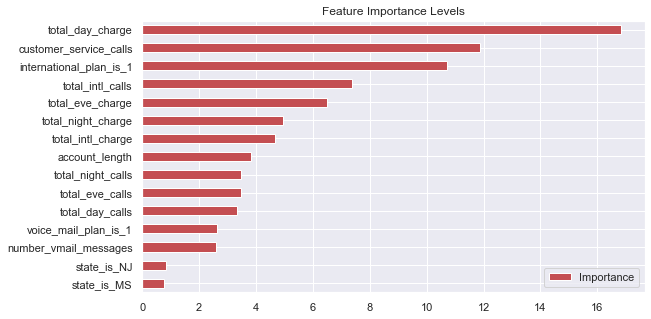

In [183]:
Importance =pd.DataFrame({"Importance": randomforest_model2.feature_importances_*100},index = X_train_over.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "r",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()

In [186]:
print(classification_report(y_test, y_pred_final, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       678
           1       0.69      0.72      0.71       104

    accuracy                           0.92       782
   macro avg       0.83      0.84      0.83       782
weighted avg       0.92      0.92      0.92       782



HYPERPARAMETER TUNED RANDOM FOREST
Accuracy score for testing set:  0.92072
F1 score for testing set:  0.70755
Recall score for testing set:  0.72115
Precision score for testing set:  0.69444


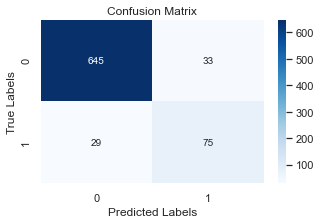

In [189]:
print("HYPERPARAMETER TUNED RANDOM FOREST")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_final),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_final),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_final),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_final),5))
conf_mtx_rf = confusion_matrix(y_test, y_pred_final)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(conf_mtx_rf, annot=True, cmap='Blues', fmt='g', ax=ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

# Conclusion and Recommendation

The key findings of the analysis, such as the factors that contribute to customer churn and the performance of the prediction models are: total day charge, customer service voice calls and international calls

The recommendations section should provide actionable steps that can be taken to reduce customer churn and improve customer retention. Some common recommendations include:

1. Improving customer service: This could involve increasing the number of customer service representatives available to handle customer calls, or providing more training to customer service representatives to better handle customer complaints and issues.

2. Offering promotions and discounts: Offering promotions and discounts to customers can help retain them and reduce churn.

3. Providing better value for money: Customers may churn if they feel they are paying too much for the services they receive. Providing better value for money, such as lower prices or more included services, can help retain customers and reduce churn.

4. Improving network coverage and quality: Improving network coverage and quality can help reduce the number of customer complaints and issues and improve customer satisfaction.

5. Adding new features and services: Adding new features and services can help retain customers and reduce churn by keeping them interested and engaged with the services offered.